# Data Analysis

Data analysis example

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import os
import struct

In [8]:
path = '.'
cps_per_uSvH = 68.4 / 60
f_clk = 8000000

## Load intervals

In [9]:
# Load data
intervals = []
interval_files = [os.path.join(path, f) for f in os.listdir(path) if os.path.isfile(os.path.join(path, f)) and f.endswith('intervals.bin')]
for interval_file in interval_files:
    interval_data = open(interval_file, 'rb').read()
    for i in range(0, len(interval_data), 4):
        value = struct.unpack(">I", interval_data[i:i + 4])[0] / f_clk
        intervals.append(value)

intervals = np.array(intervals)

## Radiation rate

In [10]:
# Generate samples from intervals
samples = [0]
time = 0
for interval in intervals:
    time += interval
    while time > 1:
        samples.append(0)
        time -= 1
    samples[-1] += 1

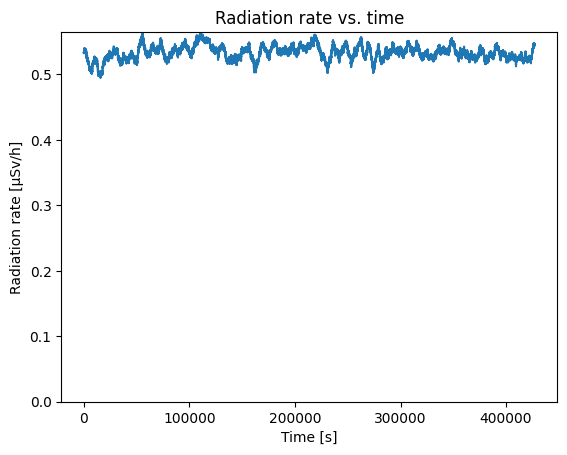

In [11]:
# Moving average filter
N = 5000

filtered_samples = np.convolve(samples, np.ones(N) / N, mode='valid') / cps_per_uSvH

# Plot
plt.plot(filtered_samples)
plt.ylim(0, max(filtered_samples))
plt.xlabel('Time [s]')
plt.ylabel('Radiation rate [µSv/h]')
plt.title('Radiation rate vs. time')
plt.show()

## Probability density function

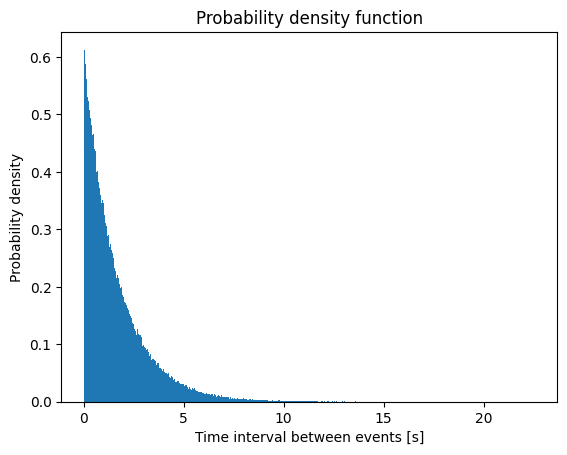

In [12]:
# Plot
plt.hist(intervals, 500, density=True)
plt.xlabel('Time interval between events [s]')
plt.ylabel('Probability density')
plt.title('Probability density function')
plt.show()

In [13]:
len(intervals)

262688